<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main_b1/aapl_ema100_ema200_crossover_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Data shape after dropna: (11241, 19)
NaN values in DataFrame:
 Open            0
High            0
Low             0
Close           0
Volume          0
EMA100          0
EMA200          0
RSI             0
EMA12           0
EMA26           0
MACD            0
Signal          0
ATR             0
VWAP            0
Prev_Close      0
Prev_EMA100     0
Momentum        0
Volatility      0
Lag_Momentum    0
dtype: int64

Data head:
        Open      High       Low     Close    Volume    EMA100    EMA200  \
0  0.154018  0.155134  0.154018  0.154018  21660800  0.130797  0.129581   
1  0.151228  0.151228  0.150670  0.150670  35728000  0.131190  0.129791   
2  0.144531  0.144531  0.143973  0.143973  45158400  0.131443  0.129932   
3  0.138393  0.138393  0.137835  0.137835  55686400  0.131570  0.130010   
4  0.135603  0.135603  0.135045  0.135045  39827200  0.131639  0.130061   

         RSI     EMA12     EMA26      MACD    Signal       ATR      VWAP  \
0  67.424662  0.144481  0.137128  0.007353

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4645 - loss: 0.6997 - val_accuracy: 0.5373 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5002 - loss: 0.6948 - val_accuracy: 0.5490 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5051 - loss: 0.6921 - val_accuracy: 0.5294 - val_loss: 0.6917 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5006 - loss: 0.6925 - val_accuracy: 0.5020 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5398 - loss: 0.6904 - val_accuracy: 0.5412 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5419 - loss: 0.6910 - val_accuracy: 0.5765 - val_loss: 0.6937 - learning_rate: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5469 - loss: 0.6911 - val_accuracy: 0.53

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       148
           1       0.00      0.00      0.00       170

    accuracy                           0.47       318
   macro avg       0.23      0.50      0.32       318
weighted avg       0.22      0.47      0.30       318


XGBoost Test Accuracy: 0.9057

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       148
           1       0.94      0.88      0.91       170

    accuracy                           0.91       318
   macro avg       0.91      0.91      0.91       318
weighted avg       0.91      0.91      0.91       318


XGBoost Test Accuracy with 0.6 Threshold: 0.8711
XGBoost Classification Report with 0.6 Threshold:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       148
           1       0.96      0.79      0.8

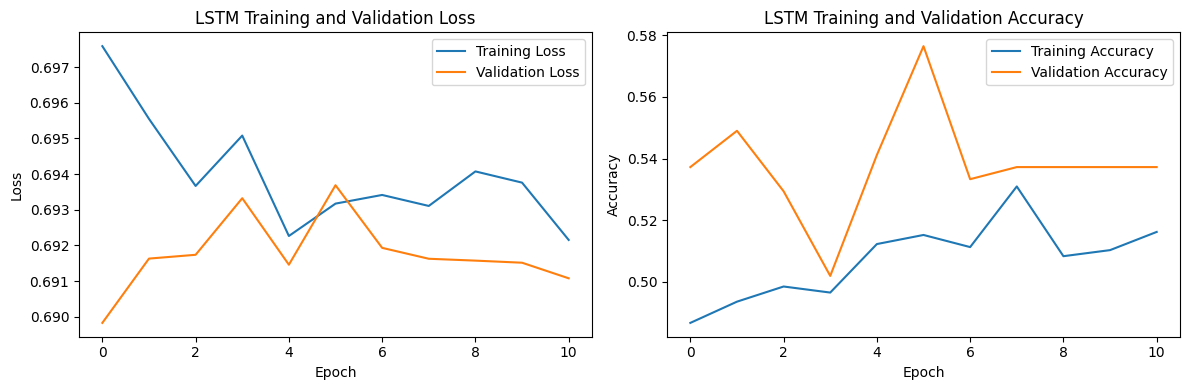

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Fetch daily AAPL data
ticker = "AAPL"
data = yf.download(ticker, period="max", interval="1d", auto_adjust=False)

# 2. Flatten MultiIndex columns
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# 3. Calculate features
data['EMA100'] = data['Close'].ewm(span=100, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

def calculate_rsi(data, periods=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = calculate_rsi(data)

data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

def calculate_atr(data, periods=14):
    high_low = data['High'] - data['Low']
    high_close = (data['High'] - data['Close'].shift(1)).abs()
    low_close = (data['Low'] - data['Close'].shift(1)).abs()
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return tr.rolling(window=periods).mean()

data['ATR'] = calculate_atr(data)

data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data['Prev_Close'] = data['Close'].shift(1)
data['Prev_EMA100'] = data['EMA100'].shift(1)
data['Momentum'] = data['Close'] / data['Prev_Close'] - 1  # Placed after Prev_Close as requested

# Add volatility and lagged momentum features
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Lag_Momentum'] = data['Momentum'].shift(1)

data = data.dropna().reset_index(drop=True)

print("Data shape after dropna:", data.shape)
print("NaN values in DataFrame:\n", data.isna().sum())
print("\nData head:\n", data.head())
print("\nData index:\n", data.index)

data['Crossover'] = ((data['High'] > data['EMA100']) & (data['EMA100'] > data['Low'])).astype(int)

crossover_count = data['Crossover'].sum()
print("Number of crossover events:", crossover_count)

sequence_length = 30
look_forward = 2
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'EMA100', 'EMA200', 'Momentum', 'Volume', 'RSI', 'MACD', 'ATR', 'VWAP', 'Volatility', 'Lag_Momentum']])

X, y, signal_types, original_indices = [], [], [], []
for i in range(sequence_length, len(data) - look_forward):
    if data['Crossover'].iloc[i] == 1:
        X.append(scaled_data[i-sequence_length:i])
        if data['EMA100'].iloc[i] > data['EMA200'].iloc[i]:
            max_high = data['High'].iloc[i+1:i+1+look_forward].max()
            y.append(1 if max_high > data['EMA100'].iloc[i] else 0)
            signal_types.append('Buy')
        else:
            min_low = data['Low'].iloc[i+1:i+1+look_forward].min()
            y.append(1 if min_low < data['EMA100'].iloc[i] else 0)
            signal_types.append('Sell')
        original_indices.append(i)

X = np.array(X)
y = np.array(y)
signal_types = np.array(signal_types)
original_indices = np.array(original_indices)

if len(X) == 0:
    print("No crossover events found in the data.")
    exit()
print("\nNumber of labeled crossover events:", len(X))
print("Label distribution:\n", pd.Series(y).value_counts())
print("Signal type distribution:\n", pd.Series(signal_types).value_counts())
baseline_prob = sum(y) / len(y)
print(f"Baseline probability of success (High > EMA100 for Buy, Low < EMA100 for Sell) within {look_forward} days: {baseline_prob:.4f}")

if len(X) < crossover_count:
    crossover_indices = data.index[data['Crossover'] == 1].tolist()
    excluded_indices = [i for i in crossover_indices if i >= len(data) - look_forward]
    print(f"Excluded crossovers (in last {look_forward} rows):", excluded_indices)

smote = SMOTE(random_state=42)
X_reshaped = X.reshape(X.shape[0], -1)
X_balanced, y_balanced = smote.fit_resample(X_reshaped, y)
X_balanced = X_balanced.reshape(-1, sequence_length, X.shape[2])
print("\nLabel distribution after SMOTE:\n", pd.Series(y_balanced).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
train_indices, test_indices = train_test_split(np.arange(len(X)), test_size=0.2, random_state=42)

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

lstm_model = Sequential([
    LSTM(32, activation='tanh', input_shape=(sequence_length, 11)),  # Updated to 11 features
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5)
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping, lr_scheduler], verbose=1)

loss, accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"\nLSTM Test Accuracy: {accuracy:.4f}")
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)
print("\nLSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

# XGBoost with native API and early stopping
tscv = TimeSeriesSplit(n_splits=10)
train_idx, val_idx = list(tscv.split(X_train_2d))[-1]  # Use the last split for validation
dtrain = xgb.DMatrix(X_train_2d[train_idx], label=y_train[train_idx])
dval = xgb.DMatrix(X_train_2d[val_idx], label=y_train[val_idx])
dtest = xgb.DMatrix(X_test_2d, label=y_test)

params = {
    'max_depth': 10,  # Increased from 8
    'learning_rate': 0.05,  # Reduced from 0.1
    'objective': 'binary:logistic',
    'random_state': 42
}
evals = [(dtrain, 'train'), (dval, 'validation')]
booster = xgb.train(params, dtrain, num_boost_round=500, evals=evals,
                    early_stopping_rounds=20, verbose_eval=False)  # Increased from 10

y_pred_xgb = booster.predict(dtest)
y_pred_xgb_binary = (y_pred_xgb > 0.5).astype(int)
xgb_accuracy = (y_pred_xgb_binary == y_test).mean()
print(f"\nXGBoost Test Accuracy: {xgb_accuracy:.4f}")
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb_binary))

y_pred_proba_xgb = y_pred_xgb
for threshold in [0.6, 0.7, 0.8]:
    y_pred_xgb_threshold = (y_pred_proba_xgb > threshold).astype(int)
    xgb_accuracy_threshold = (y_pred_xgb_threshold == y_test).mean()
    print(f"\nXGBoost Test Accuracy with {threshold} Threshold: {xgb_accuracy_threshold:.4f}")
    print(f"XGBoost Classification Report with {threshold} Threshold:\n", classification_report(y_test, y_pred_xgb_threshold))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization skipped